In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import LabelEncoder

import statsmodels.graphics.tsaplots as sgt
import scipy.stats as stats

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_validate

le = LabelEncoder()
# from catboost import CatBoostClassifier, Pool
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from functools import partial
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# fmin - основная функция, она будет минимизировать наш функционал
# tpe - алгоритм оптимизации
# hp - включает набор методов для объявления пространства поиска гиперпараметров
# trails - используется для логирования результатов

%matplotlib inline
sns.set_context("talk")

# random state
RS = 1
# %matplotlib widget

In [ ]:
#В колабе импортируем все необходимые библиотеки
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Привязываем гуглдиск к колабу
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
folder_id = '10p0lq5F8sqA5wk0sOGO-PggX9XzPgEe0'  # Замените на ID вашей папки
# https://drive.google.com/drive/folders/10p0lq5F8sqA5wk0sOGO-PggX9XzPgEe0?usp=drive_link

file_list = drive.ListFile({'q': f"'{folder_id}' in parents and trashed=false"}).GetList()
filename_list = []
for file in file_list:
  filename_list.append(file['title'])

In [ ]:
filename_list

['meta_information',
 '2023-05-31_15-46-37.palm',
 '2023-05-31_15-46-37.palm.protocol.csv',
 'meta_information.csv',
 '2023-05-31_17-14-41.palm.protocol.csv',
 '2023-05-31_17-14-41.palm',
 '2023-10-23_14-07-13.palm.protocol.csv',
 '2023-10-25_08-52-30.palm',
 '2023-09-29_09-20-47.palm.protocol.csv',
 '2023-09-13_22-14-05.palm.protocol.csv',
 '2023-09-29_11-03-50.palm.protocol.csv',
 '2023-10-23_14-07-13.palm',
 '2023-09-29_11-03-50.palm',
 '2023-09-30_08-06-44.palm',
 '2023-10-25_11-08-46.palm.protocol.csv',
 '2023-10-18_11-16-21.palm',
 '2023-10-25_11-08-46.palm',
 '2023-10-23_10-11-45.palm.protocol.csv',
 '2023-10-18_11-16-21.palm.protocol.csv',
 '2023-09-30_08-06-44.palm.protocol.csv',
 '2023-10-18_08-05-29.palm.protocol.csv',
 '2023-09-12_12-55-22.palm.protocol.csv',
 '2023-10-25_08-52-30.palm.protocol.csv',
 '2023-09-29_09-20-47.palm',
 '2023-06-20_14-43-11.palm',
 '2023-10-23_10-11-45.palm',
 '2023-10-18_08-05-29.palm',
 '2023-09-12_14-59-23.palm.protocol.csv',
 '2023-06-20_13-30

ТЗ: При разработке модели необходимо проверить, возможно ли обучить ее на данных предыдущих пилотов для последующего их использования новыми пилотами;

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

import statsmodels.graphics.tsaplots as sgt
import scipy.stats as stats

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import cross_validate

# from catboost import CatBoostClassifier, Pool
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from functools import partial
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
# fmin - основная функция, она будет минимизировать наш функционал
# tpe - алгоритм оптимизации
# hp - включает набор методов для объявления пространства поиска гиперпараметров
# trails - используется для логирования результатов

%matplotlib inline
sns.set_context("talk")

# random state
RS = 1
# %matplotlib widget

Нам неизвестны количество пилотов и характеристики их двиижений.
Идея состоит в том, чтобы кластеризовать данные разных пилотов.
Если модель сможет выделить их характеристики в кластеры, то гипотезу об индивидуальности их стиля можно будет считать доказанной и мы сможем предсказывать их кластер по данным модели и экономить время на обучение модели.

In [ ]:
from google.colab import drive
# Это потребует авторизации.

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls

data  drive  sample_data  table_1


In [ ]:
!mkdir ./data

mkdir: cannot create directory ‘./data’: File exists


In [ ]:
!cp -r "/content/drive/MyDrive/_Проекты /Моторика/Стажировка/motorica-x-skillfactory-gestures/data" "/content"

cp: cannot open '/content/drive/MyDrive/_Проекты /Моторика/Стажировка/motorica-x-skillfactory-gestures/data/meta_information.gsheet' for reading: Operation not supported


In [ ]:
df_meta = pd.read_csv('/content/data/meta_information.csv', index_col=0)

# IO utils


In [ ]:
def read_omg_csv(path_palm_data: str,
                 n_omg_channels: int,
                 n_acc_channels: int = 0,
                 n_gyr_channels: int = 0,
                 n_mag_channels: int = 0,
                 n_enc_channels: int = 0,
                 button_ch: bool = True,
                 sync_ch: bool = True,
                 timestamp_ch: bool = True) -> pd.DataFrame:

    '''
    Reads CSV data for OMG data
    NB: data must be separated by " " separator

        Parameters:
                path_palm_data  (str): path to csv data file
                n_omg_channels  (int): Number of OMG channels
                n_acc_channels  (int): Number of Accelerometer channels, default = 0
                n_gyr_channels  (int): Number of Gyroscope channels, default = 0
                n_mag_channels  (int): Number of Magnetometer channels, default = 0
                n_enc_channels  (int): Number of Encoder channels, default = 0
                button_ch      (bool): If button channel is present, default = True
                sync_ch        (bool): If synchronization channel is present, default = True
                timestamp_ch   (bool): If timestamp channel is present, default = True

        Returns:
                df_raw (pd.DataFrame): Parsed pandas Dataframe with OMG data
    '''

    df_raw = pd.read_csv(path_palm_data, sep=' ',
                         header=None,
                         skipfooter=1,
                         skiprows=1,
                         engine='python')
    columns = np.arange(n_omg_channels).astype('str').tolist()

    for label, label_count in zip(['ACC', 'GYR', 'MAG', 'ENC'],
                                  [n_acc_channels, n_gyr_channels, n_mag_channels, n_enc_channels]):
        columns = columns + ['{}{}'.format(label, i) for i in range(label_count)]

    if button_ch:
        columns = columns + ['BUTTON']

    if sync_ch:
        columns = columns + ['SYNC']

    if timestamp_ch:
        columns = columns + ['ts']

    df_raw.columns = columns

    return df_raw

In [ ]:
filename_list[2][-12:-4]

'protocol'

In [ ]:
def add_feature_derivative(df):
  """Функция для добавления признака производной

    Args:
        df (DataFrame): датасет

    Returns:
        df_log(DataFrame): датасет с добавленным признаком производной
  """
  col_list_base = list(df.columns) #исходный список признаков
  df_temp = df.copy()
  for i in col_list_base:
    col_add = f'der_{i}' #название для нового признака
    df_temp[col_add] = df_temp[i].diff() #создаем признак
    df_temp.fillna(0, inplace = True) #удаляем пустоты
  df_temp.drop(col_list_base, axis = 1 , inplace = True)
  return df_temp

def get_clean_lines(df, treshold = 1.5):
  """Функция для преобразования временного ряда.
  Преобразует все значения выше определенного порога в 1, ниже в 0

    Args:
        df (Series): датасет

    Returns:
        result(DataFrame): преобразованный датасет
  """
  result = np.zeros(df.shape) #создаем массив заполненный нулями размером с датасет
  means = np.mean(df) #выводим среднюю
  for i in range(df.shape[0]): #перебираем значения
    if abs(df[i]) > means*treshold:  #реализуем логику
      result[i] = 1
    else:
      result[i] = 0
  return pd.DataFrame(result)

def shift_definition(df, target):
  """Функция для нахождения временной задержки между командой и её исполнением

    Args:
        df (DataFrame): датасет с показаниями датчиков
        target (DataFrame): данные протокола выполнения команд
    Returns:
        best_shift (int): временной сдвиг
  """
  # рассчитываем производные значений временных датчиков
  gestures_der = add_feature_derivative(df)
  # суммируем модули значений производных
  gestures_der_sum = abs(gestures_der).sum(axis = 1)
  # обнуляем значения ниже порога
  gestures_der_sum_clean = get_clean_lines(gestures_der_sum, treshold = 1.5)

  # преобразуем целевую переменную в DataFrame
  target_df = pd.DataFrame(target)
  # рассчитываем производные значений таргета
  target_der = add_feature_derivative(target_df)
  # преобразуем таргет, если есть жест 1, если нет 0
  for i in range(len(target_der)):
      if (target_der.iloc[i] != 0).bool():
        target_der.iloc[i] = 1

  # объединяем преобразованный таргет и преобрразованную сумму производных в одну таблицу
  data = pd.concat([gestures_der_sum_clean.shift(1), target_der], axis=1).dropna()
  data.columns = ['y_t', 'first_derivative']
  # определяем, при каком сдвиге корреляция  максимальна
  corr_temp = []
  for i in range(1, 40):
    data['y_t'] = data['y_t'].shift(i)
    corr_coef = data.corr()
    corr_temp.append(corr_coef.iloc[1,0])
  l = pd.Series(corr_temp)
  best_shift = l[l == max(corr_temp)]
  return best_shift.index[0]

# Data

In [ ]:
df_meta = pd.read_csv('/content/data/meta_information.csv', index_col=0)
df_meta.head()

,montage,pilote_id,last_train_idx,len(train),len(test)
0,2023-05-15_16-16-08.palm,1,23337,23337,5810
1,2023-05-15_17-12-24.palm,1,23336,23336,5803
2,2023-06-05_16-12-38.palm,1,17939,17939,4431
3,2023-06-05_17-53-01.palm,1,17771,17771,4435
4,2023-06-20_14-43-11.palm,1,17936,17936,4441


In [ ]:
df_meta['montage'].value_counts()

2023-05-15_16-16-08.palm                   1
2023-05-22_17-04-29.palm                   1
2023-10-18_08-05-29.palm                   1
2023-10-23_10-11-45.palm                   1
2023-10-23_14-07-13.palm                   1
2023-10-23_16-23-02.palm                   1
2023-10-25_08-52-30.palm                   1
patched_2023-10-25_09-44-02.palm           1
2023-10-25_11-08-46.palm                   1
2023-05-05_17-57-30.palm                   1
2023-05-12_19-17-00.palm                   1
2023-05-07_15-19-05.palm                   1
2023-05-07_16-54-27.palm                   1
2023-04-18_19-08-47 gestures train.palm    1
2023-05-19_12-04-02.palm                   1
2023-05-22_20-22-01.palm                   1
2023-05-15_17-12-24.palm                   1
2023-05-31_15-46-37.palm                   1
2023-05-31_17-14-41.palm                   1
2023-09-12_12-55-22.palm                   1
2023-09-12_14-59-23.palm                   1
2023-09-13_22-14-05.palm                   1
2023-09-29

In [ ]:
# for num, name in enumerate(filename_list):
#   if name[-4:] == 'palm':
#     palm_file = f'/content/data/{name}'
#     pilot_num = df_meta[df_meta['montage'] == name]['pilote_id']
#     # print(list(pilot_num)[0])
#     globals()[f'gestures_{num}_{list(pilot_num)[0]}'] = read_omg_csv(palm_file,
#                               n_omg_channels=50,
#                               n_acc_channels=3,
#                               n_gyr_channels=3,
#                               n_enc_channels=6,
#                               n_mag_channels=0)
#     print(f'gestures_{num}_{list(pilot_num)[0]}')
#     # y = f'gestures_{num}_{list(pilot_num)[0]}'
#     # exec('y.shape')

In [ ]:
OMG_CH = [str(i) for i in range(50)]

ACC_CH = ['ACC0', 'ACC1', 'ACC2']
GYR_CH = ['GYR0', 'GYR1', 'GYR2']
ENC_CH = ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH = ['BUTTON', 'SYNC', 'ts']

#gestures[OMG_CH + ACC_CH + GYR_CH + ENC_CH]

# assert len(OMG_CH)+len(ACC_CH)+len(GYR_CH)+len(ENC_CH)+len(BUTTON_SYNC_TS_CH) == gestures.shape[-1]

print(f"OMG_CH: {list(OMG_CH)}")
print(f"ACC_CH: {list(ACC_CH)}")
print(f"GYR_CH: {list(GYR_CH)}")
print(f"ENC_CH: {list(ENC_CH)}")
print(f"BUTTON_SYNC_TS_CH: {list(BUTTON_SYNC_TS_CH)}")

OMG_CH: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49']
ACC_CH: ['ACC0', 'ACC1', 'ACC2']
GYR_CH: ['GYR0', 'GYR1', 'GYR2']
ENC_CH: ['ENC0', 'ENC1', 'ENC2', 'ENC3', 'ENC4', 'ENC5']
BUTTON_SYNC_TS_CH: ['BUTTON', 'SYNC', 'ts']


In [ ]:
list_table = []
table_1 = pd.DataFrame()
table_2 = pd.DataFrame()
table_3 = pd.DataFrame()
table_4 = pd.DataFrame()
for name in filename_list:
  # если в названии файла есть protocol
  if name[-12:-4] == 'protocol':
    # работать будем с этим файлом
    palm_file = f'/content/data/{name}'
    # определяем номер пилота
    pilot_num = df_meta[df_meta['montage'] == name[:-13]]['pilote_id']
    # определяем имя будущего файла
    table_name = f'protocol_{name[-23:-18]}_{list(pilot_num)[0]}'
    # Создаем объект с динамическим именем и устанавливаем его атрибут
    # Загружаем нужный файл в таблицу
    setattr(pd, table_name, pd.read_csv(f'{palm_file}', index_col=0))
    # FIT
    transform_table = getattr(pd, table_name)
    le.fit(
        transform_table[[
            "Thumb","Index","Middle","Ring","Pinky",
            'Thumb_stretch','Index_stretch','Middle_stretch','Ring_stretch','Pinky_stretch'
        ]]
        .apply(lambda row: str(tuple(row)), axis=1)
    )

    # TRANSFORM
    transform_table['gesture'] = le.transform(
        transform_table[[
            "Thumb","Index","Middle","Ring","Pinky",
            'Thumb_stretch','Index_stretch','Middle_stretch','Ring_stretch','Pinky_stretch'
        ]]
        .apply(lambda row: str(tuple(row)), axis=1)
    )

    # теперь находим файл испытаний, соответствующему испытаниям
    palm_file = f'/content/data/{name[:-13]}'
    # Создаем объект с динамическим именем и устанавливаем его атрибут
    # название файла с наблюдениями
    gest_table_name = f'gestures_{name[-23:-18]}_{list(pilot_num)[0]}'
    setattr(pd, gest_table_name, read_omg_csv(palm_file,
                            n_omg_channels=50,
                            n_acc_channels=3,
                            n_gyr_channels=3,
                            n_enc_channels=6,
                            n_mag_channels=0))
    gest = getattr(pd, gest_table_name)

    # синхронизируем файл испытаний и протокол
    sync_name = f'y_cmd_{name[-23:-18]}_{list(pilot_num)[0]}'
    setattr(pd, sync_name, np.array([transform_table['gesture'].loc[s] for s in gest['SYNC'].values]))
    y_prot = getattr(pd, sync_name)

    # находим наилучший временной сдвиг для конкретной пары наблюдения-протокол
    best_shift = shift_definition(gest[OMG_CH + ACC_CH + GYR_CH + ENC_CH], y_prot)
     # сдвигаем данные в соответсвии с найденным сдвигом
    y_prot = pd.DataFrame(y_prot)
    y_prot = y_prot.shift(best_shift).fillna(0)
    y_prot.columns = ['gest']
    y_prot['name'] = name[-23:-18]
    # # стандартизируем таблицу наблюдений
    # # сохраним названия столбцов
    # gest_columns = gest.columns
    # gest = StandardScaler().fit_transform(gest)
    # gest = pd.DataFrame(gest, columns = gest_columns)
    # # рассчитываем производные значений временных датчиков
    # gestures_der = add_feature_derivative(gest)
    # # суммируем модули значений производных
    # gestures_der_sum = abs(gestures_der).sum(axis = 1)

    # объединяем файлы по пилотам
    # имя для объединенной таблицы
    table_name_concat = f'concat_{name[-23:-18]}_{list(pilot_num)[0]}'
    setattr(pd, table_name_concat, pd.concat([gest, y_prot], axis=1).dropna())
    # print(table_name_concat)
    table_concat = getattr(pd, table_name_concat)
    if list(pilot_num)[0] == 1:
      table_1 = pd.concat([table_concat, table_1])
    elif list(pilot_num)[0]== 2:
      table_2 = pd.concat([table_concat, table_2])
    elif list(pilot_num)[0]== 3:
      table_3 = pd.concat([table_concat, table_3])
    elif list(pilot_num)[0]== 4:
      table_4 = pd.concat([table_concat, table_4])

print(table_1.shape, table_2.shape, table_3.shape, table_4.shape)
# print(list_table)

(169790, 67) (252665, 67) (77002, 67) (26648, 67)


In [ ]:
# Сериализация
import pickle
with open('table_1', 'wb') as fp:
    pickle.dump(table_1, fp)
with open('table_2', 'wb') as fp:
    pickle.dump(table_2, fp)
with open('table_3', 'wb') as fp:
    pickle.dump(table_3, fp)
with open('table_4', 'wb') as fp:
    pickle.dump(table_4, fp)

# Скачивание из colab на локальный компьютер
from google.colab import files
files.download('table_1')
files.download('table_2')
files.download('table_3')
files.download('table_4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
table_1.head()

,0,1,2,3,4,5,6,7,8,9,...,ENC1,ENC2,ENC3,ENC4,ENC5,BUTTON,SYNC,ts,gest,name
0,6,3,11,2455,3160,1,1573,7,4,1,...,0,0,0,0,0,0,0,129186,0.0,12-24
1,6,0,12,2454,3158,1,1574,8,12,6,...,0,0,0,0,0,0,0,129219,0.0,12-24
2,10,2,13,2461,3165,1,1579,9,5,4,...,0,0,0,0,0,0,0,129252,0.0,12-24
3,5,4,10,2453,3160,11,1575,8,12,5,...,0,0,0,0,0,0,0,129285,0.0,12-24
4,7,3,15,2454,3157,1,1575,8,8,2,...,0,0,0,0,0,0,0,129318,0.0,12-24


In [ ]:
table_1['gest'].value_counts()

0.0    103628
1.0     13266
5.0     13246
4.0     13238
3.0     13228
2.0     13184
Name: gest, dtype: int64

In [ ]:
table_1.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)

In [ ]:
table_1_0 = table_1[table_1['gest'] == 0.0]
table_1_1 = table_1[table_1['gest'] == 1.0]
table_1_2 = table_1[table_1['gest'] == 2.0]
table_1_3 = table_1[table_1['gest'] == 3.0]
table_1_4 = table_1[table_1['gest'] == 4.0]
table_1_5 = table_1[table_1['gest'] == 5.0]
table_1_0['gest'].value_counts()


0.0    103628
Name: gest, dtype: int64

In [ ]:
table_1_0.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'ACC0', 'ACC1', 'ACC2', 'GYR0', 'GYR1', 'GYR2', 'ENC0', 'gest',
       'name'],
      dtype='object')

In [ ]:
scaler = StandardScaler()

In [ ]:
cols = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', 'ACC0', 'ACC1', 'ACC2', 'GYR0', 'GYR1', 'GYR2', 'ENC0']
table_1_0.loc[:, 'sum']= scaler.fit_transform(table_1_0[cols]).sum(axis=1)
table_1_1.loc[:, 'sum']= scaler.fit_transform(table_1_1[cols]).sum(axis=1)
table_1_2.loc[:, 'sum']= scaler.fit_transform(table_1_2[cols]).sum(axis=1)
table_1_3.loc[:, 'sum']= scaler.fit_transform(table_1_3[cols]).sum(axis=1)
table_1_4.loc[:, 'sum']= scaler.fit_transform(table_1_4[cols]).sum(axis=1)
table_1_5.loc[:, 'sum']= scaler.fit_transform(table_1_5[cols]).sum(axis=1)
table_1_0.drop(columns =cols, inplace = True)

<ipython-input-25-2d29dd8ed96a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_1_0.loc[:, 'sum']= scaler.fit_transform(table_1_0[cols]).sum(axis=1)
<ipython-input-25-2d29dd8ed96a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_1_1.loc[:, 'sum']= scaler.fit_transform(table_1_1[cols]).sum(axis=1)
<ipython-input-25-2d29dd8ed96a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [ ]:
table_1_0['name'].value_counts()

16-08    18898
12-24    18862
12-38    13295
43-11    13278
30-15    13178
53-01    13065
34-17    13052
Name: name, dtype: int64

<Axes: >

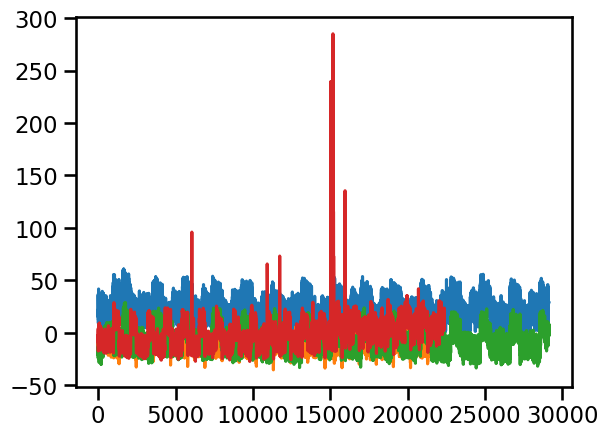

In [ ]:
table_1_0[table_1_0['name'] == '12-24']['sum'].plot()
table_1_0[table_1_0['name'] == '30-15']['sum'].plot()
table_1_0[table_1_0['name'] == '16-08']['sum'].plot()
table_1_0[table_1_0['name'] == '43-11']['sum'].plot()

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [ ]:
dbscan = DBSCAN()

In [ ]:
table_1_0['prediction_dbscan_1'] = dbscan.fit_predict(table_1_0['sum'].values.reshape(-1, 1))
table_1_1['prediction_dbscan_1'] = dbscan.fit_predict(table_1_1['sum'].values.reshape(-1, 1))
table_1_2['prediction_dbscan_1'] = dbscan.fit_predict(table_1_2['sum'].values.reshape(-1, 1))
table_1_3['prediction_dbscan_1'] = dbscan.fit_predict(table_1_3['sum'].values.reshape(-1, 1))
table_1_4['prediction_dbscan_1'] = dbscan.fit_predict(table_1_4['sum'].values.reshape(-1, 1))
table_1_5['prediction_dbscan_1'] = dbscan.fit_predict(table_1_5['sum'].values.reshape(-1, 1))
table_1_0.head()

<ipython-input-30-6bbe73290562>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_1_0['prediction_dbscan_1'] = dbscan.fit_predict(table_1_0['sum'].values.reshape(-1, 1))
<ipython-input-30-6bbe73290562>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_1_1['prediction_dbscan_1'] = dbscan.fit_predict(table_1_1['sum'].values.reshape(-1, 1))
<ipython-input-30-6bbe73290562>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,gest,name,sum,prediction_dbscan_1
0,0.0,12-24,15.905201,0
1,0.0,12-24,34.442600,0
2,0.0,12-24,23.653133,0
3,0.0,12-24,24.678049,0
4,0.0,12-24,30.142179,0


In [ ]:
table_dbscan_1 = pd.concat([table_1_0,table_1_1,table_1_2,table_1_3,table_1_4,table_1_5], ignore_index= True)

In [ ]:
table_dbscan_1[table_dbscan_1.prediction_dbscan_1 < 0]['name'].value_counts()

12-24    55
34-17    16
43-11    13
16-08    11
30-15     7
Name: name, dtype: int64

# 2 пилот

In [ ]:
table_2.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)

table_2_0 = table_2[table_2['gest'] == 0.0]
table_2_1 = table_2[table_2['gest'] == 1.0]
table_2_2 = table_2[table_2['gest'] == 2.0]
table_2_3 = table_2[table_2['gest'] == 3.0]
table_2_4 = table_2[table_2['gest'] == 4.0]
table_2_5 = table_2[table_2['gest'] == 5.0]

table_2_0.loc[:, 'sum']= scaler.fit_transform(table_2_0[cols]).sum(axis=1)
table_2_1.loc[:, 'sum']= scaler.fit_transform(table_2_1[cols]).sum(axis=1)
table_2_2.loc[:, 'sum']= scaler.fit_transform(table_2_2[cols]).sum(axis=1)
table_2_3.loc[:, 'sum']= scaler.fit_transform(table_2_3[cols]).sum(axis=1)
table_2_4.loc[:, 'sum']= scaler.fit_transform(table_2_4[cols]).sum(axis=1)
table_2_5.loc[:, 'sum']= scaler.fit_transform(table_2_5[cols]).sum(axis=1)
table_2_0.drop(columns =cols, inplace = True)

table_2_0['prediction_dbscan_2'] = dbscan.fit_predict(table_2_0['sum'].values.reshape(-1, 1))
table_2_1['prediction_dbscan_2'] = dbscan.fit_predict(table_2_1['sum'].values.reshape(-1, 1))
table_2_2['prediction_dbscan_2'] = dbscan.fit_predict(table_2_2['sum'].values.reshape(-1, 1))
table_2_3['prediction_dbscan_2'] = dbscan.fit_predict(table_2_3['sum'].values.reshape(-1, 1))
table_2_4['prediction_dbscan_2'] = dbscan.fit_predict(table_2_4['sum'].values.reshape(-1, 1))
table_2_5['prediction_dbscan_2'] = dbscan.fit_predict(table_2_5['sum'].values.reshape(-1, 1))

table_dbscan_2 = pd.concat([table_2_0,table_2_1,table_2_2,table_2_3,table_2_4,table_2_5], ignore_index= True)

table_dbscan_2[table_dbscan_2.prediction_dbscan_2 < 0]['name'].value_counts()

<ipython-input-33-fcfd61fe9548>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_2_0.loc[:, 'sum']= scaler.fit_transform(table_2_0[cols]).sum(axis=1)
<ipython-input-33-fcfd61fe9548>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_2_1.loc[:, 'sum']= scaler.fit_transform(table_2_1[cols]).sum(axis=1)
<ipython-input-33-fcfd61fe9548>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
table_3.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)

table_3_0 = table_3[table_3['gest'] == 0.0]
table_3_1 = table_3[table_3['gest'] == 1.0]
table_3_2 = table_3[table_3['gest'] == 2.0]
table_3_3 = table_3[table_3['gest'] == 3.0]
table_3_4 = table_3[table_3['gest'] == 4.0]
table_3_5 = table_3[table_3['gest'] == 5.0]

table_3_0.loc[:, 'sum']= scaler.fit_transform(table_3_0[cols]).sum(axis=1)
table_3_1.loc[:, 'sum']= scaler.fit_transform(table_3_1[cols]).sum(axis=1)
table_3_2.loc[:, 'sum']= scaler.fit_transform(table_3_2[cols]).sum(axis=1)
table_3_3.loc[:, 'sum']= scaler.fit_transform(table_3_3[cols]).sum(axis=1)
table_3_4.loc[:, 'sum']= scaler.fit_transform(table_3_4[cols]).sum(axis=1)
table_3_5.loc[:, 'sum']= scaler.fit_transform(table_3_5[cols]).sum(axis=1)
table_3_0.drop(columns =cols, inplace = True)

table_3_0['prediction_dbscan_3'] = dbscan.fit_predict(table_3_0['sum'].values.reshape(-1, 1))
table_3_1['prediction_dbscan_3'] = dbscan.fit_predict(table_3_1['sum'].values.reshape(-1, 1))
table_3_2['prediction_dbscan_3'] = dbscan.fit_predict(table_3_2['sum'].values.reshape(-1, 1))
table_3_3['prediction_dbscan_3'] = dbscan.fit_predict(table_3_3['sum'].values.reshape(-1, 1))
table_3_4['prediction_dbscan_3'] = dbscan.fit_predict(table_3_4['sum'].values.reshape(-1, 1))
table_3_5['prediction_dbscan_3'] = dbscan.fit_predict(table_3_5['sum'].values.reshape(-1, 1))

table_dbscan_3 = pd.concat([table_3_0,table_3_1,table_3_2,table_3_3,table_3_4,table_3_5], ignore_index= True)

table_dbscan_3[table_dbscan_3.prediction_dbscan_3 < 0]['name'].value_counts()

In [ ]:
table_4.drop(columns = ['ENC1','ENC2','ENC3', 'ENC4', 'ENC5', 'BUTTON', 'SYNC', 'ts'], inplace=True)

table_4_0 = table_4[table_4['gest'] == 0.0]
table_4_1 = table_4[table_4['gest'] == 1.0]
table_4_2 = table_4[table_4['gest'] == 2.0]
table_4_3 = table_4[table_4['gest'] == 3.0]
table_4_4 = table_4[table_4['gest'] == 4.0]
table_4_5 = table_4[table_4['gest'] == 5.0]

table_4_0.loc[:, 'sum']= scaler.fit_transform(table_4_0[cols]).sum(axis=1)
table_4_1.loc[:, 'sum']= scaler.fit_transform(table_4_1[cols]).sum(axis=1)
table_4_2.loc[:, 'sum']= scaler.fit_transform(table_4_2[cols]).sum(axis=1)
table_4_3.loc[:, 'sum']= scaler.fit_transform(table_4_3[cols]).sum(axis=1)
table_4_4.loc[:, 'sum']= scaler.fit_transform(table_4_4[cols]).sum(axis=1)
table_4_5.loc[:, 'sum']= scaler.fit_transform(table_4_5[cols]).sum(axis=1)
table_4_0.drop(columns =cols, inplace = True)

table_4_0['prediction_dbscan_4'] = dbscan.fit_predict(table_4_0['sum'].values.reshape(-1, 1))
table_4_1['prediction_dbscan_4'] = dbscan.fit_predict(table_4_1['sum'].values.reshape(-1, 1))
table_4_2['prediction_dbscan_4'] = dbscan.fit_predict(table_4_2['sum'].values.reshape(-1, 1))
table_4_3['prediction_dbscan_4'] = dbscan.fit_predict(table_4_3['sum'].values.reshape(-1, 1))
table_4_4['prediction_dbscan_4'] = dbscan.fit_predict(table_4_4['sum'].values.reshape(-1, 1))
table_4_5['prediction_dbscan_4'] = dbscan.fit_predict(table_4_5['sum'].values.reshape(-1, 1))

table_dbscan_4 = pd.concat([table_4_0,table_4_1,table_4_2,table_4_3,table_4_4,table_4_5], ignore_index= True)

table_dbscan_4[table_dbscan_4.prediction_dbscan_4 < 0]['name'].value_counts()

In [ ]:
# Сериализация
import pickle
with open('pilot_1', 'wb') as fp:
    pickle.dump(table_1, fp)
with open('pilot_2', 'wb') as fp:
    pickle.dump(table_2, fp)
with open('pilot_3', 'wb') as fp:
    pickle.dump(table_3, fp)
with open('pilot_4', 'wb') as fp:
    pickle.dump(table_4, fp)

In [ ]:
# # Скачивание из colab на локальный компьютер
# from google.colab import files
# files.download('pilot_1')
# files.download('pilot_2')
# files.download('pilot_3')
# files.download('pilot_4')